# Analyse the training and predictions

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import pickle
from shutil import copy2
import tensorflow
import IPython
import PIL.Image as Image

In [20]:
# Login in GOOGLE account
!gcloud auth login

Your browser has been opened to visit:

    https://accounts.google.com/o/oauth2/auth?redirect_uri=http%3A%2F%2Flocalhost%3A8085%2F&prompt=select_account&response_type=code&client_id=32555940559.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fappengine.admin+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcompute+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Faccounts.reauth&access_type=offline


Using PPAPI flash.
[14302:14302:0708/130735.376549:ERROR:sandbox_linux.cc(368)] InitializeSandbox() called with multiple threads in process gpu-process.
Opening in existing browser session.
[14259:14284:0708/130735.392046:ERROR:browser_process_sub_thread.cc(221)] Waited 3 ms for network service
If you need to use ADC, see:
  gcloud auth application-default --help

You are now logged in as [yura.mozzhorin@gmail.com].
Your current project is [painters-mnist-2].  You c

In [7]:
# Download the history and the model

bucket = 'gs://painters-mnist-2-1561980951/export/'
hist_name = 'history-top10-1562594013.pkl'
model_name = 'top10-1562594013.h5'

hist_path = '/tmp/' + hist_name
model_path = '/tmp/' + model_name

!gsutil cp {bucket}{hist_name} {hist_path}
!gsutil cp {bucket}{model_name} {model_path}

Copying gs://painters-mnist-2-1561980951/export/history-top10-1562594013.pkl...
/ [1 files][  5.2 KiB/  5.2 KiB]                                                
Operation completed over 1 objects/5.2 KiB.                                      
Copying gs://painters-mnist-2-1561980951/export/top10-1562594013.h5...
- [1 files][270.5 MiB/270.5 MiB]   24.3 MiB/s                                   
Operation completed over 1 objects/270.5 MiB.                                    


In [8]:
hist = pickle.load(open(hist_path, 'rb'))

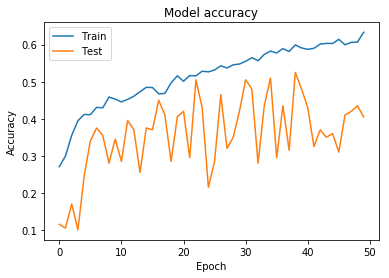

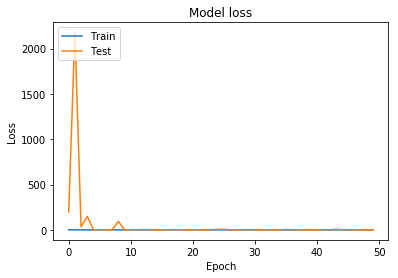

In [9]:
plt.plot(hist['acc'])
plt.plot(hist['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Check the predictions

In [10]:
from tensorflow.python.keras import saving
trained_model = saving.load_model(model_path)

W0708 15:58:25.447160 139854381397824 deprecation.py:506] From /home/mo/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:97: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0708 15:58:25.448366 139854381397824 deprecation.py:506] From /home/mo/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0708 15:58:25.450877 139854381397824 deprecation.py:506] From /home/mo/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:97: calling Ones.__init__ (from tensorflow.python.ops.init_o

In [11]:
# Import CSV and select top 10 painters
df = pd.read_csv('../all_data_info.csv')
mask = df['in_train']
train_3_df = df[mask]
top10 = train_3_df.groupby('artist').count().sort_values(by='title', ascending=False).head(10)
top10.index

Index(['Paul Cezanne', 'Giovanni Battista Piranesi', 'Martiros Saryan',
       'Ilya Repin', 'Camille Pissarro', 'Vincent van Gogh',
       'Theophile Steinlen', 'Pyotr Konchalovsky', 'Pierre-Auguste Renoir',
       'Boris Kustodiev'],
      dtype='object', name='artist')

Artist: Vincent van Gogh


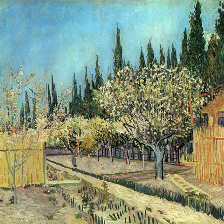

In [24]:
# Chose a random image

data_dir = '/home/mo/Downloads/painters/'
train_dir = data_dir + 'top10_x448/'
image_size = 224

rand_top10 = list(top10.index)
random.shuffle(rand_top10)
true_artist = rand_top10[0]
pictures = list(train_3_df[(train_3_df['artist'] == true_artist)]['new_filename'])
img = random.choice(pictures)
image_name = train_dir + img
image = Image.open(image_name).resize((image_size, image_size))
print('Artist: ' + true_artist)
image

In [25]:
# Get predictions
image = np.array(image)/255.0
result = trained_model.predict(image[np.newaxis, ...])
predicted_class = np.argmax(result[0], axis=-1)

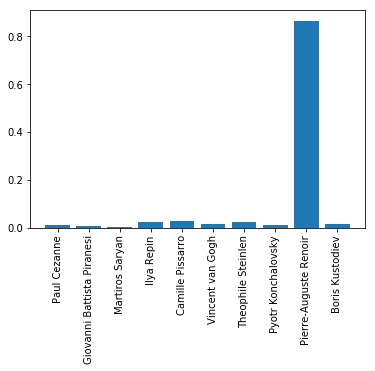

In [26]:
plt.bar(range(10), result[0])
plt.xticks(range(10), top10.index, rotation=90)
plt.show()